In [ ]:
%pip install matplotlib
%pip install pandas

In [98]:
import pandas as pd
import json
import functions.evaluetion_functions as ev
import matplotlib.pyplot as plt

# CARREGA DADOS

In [99]:
f = open('nir_ndcg.json')
nir_ndcg = json.load(f)

f = open('els_ndcg.json')
els_ndcg = json.load(f)

metrics = ev.merge(nir_ndcg, els_ndcg)

f = open('nir_recall_precision.json')
nir_f_score = json.load(f)

f = open('els_recall_precision.json')
els_f_score = json.load(f)

pd.DataFrame(els_f_score)


,query_ids,total_relevants,total_retrieveds,total_retrieved_relevants,recall,precision,f_scores
0,1,29,10,6,0.206897,0.6,0.307692
1,2,25,10,5,0.200000,0.5,0.285714
2,33,4,10,1,0.250000,0.1,0.142857
3,56,11,10,1,0.090909,0.1,0.095238
4,57,15,10,2,0.133333,0.2,0.160000
5,109,6,10,1,0.166667,0.1,0.125000
6,130,6,10,1,0.166667,0.1,0.125000
7,171,4,10,1,0.250000,0.1,0.142857
8,196,13,10,5,0.384615,0.5,0.434783
9,214,5,10,1,0.200000,0.1,0.133333


# AVALIAÇÕES

## F1 - (Recall e Precisão)

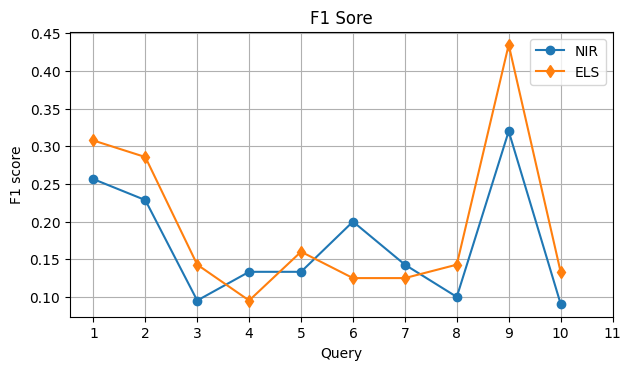

In [100]:
recall_nir = ev.dict_to_list(nir_f_score['f_scores'])[0:10]
recall_els = ev.dict_to_list(els_f_score['f_scores'])[0:10]

fig, ax = plt.subplots(figsize=(7, 3.7))
ax.plot(recall_nir, "o", label="NIR", linestyle='-')
ax.plot(recall_els, "d", label="ELS", linestyle='-')

x_stick = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
x_labels = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11"]
plt.xticks(ticks=x_stick, labels=x_labels)
plt.xticks(ticks=x_stick, labels=x_labels)

#add axis labels to plot
ax.set_title('F1 Sore')
ax.set_xlabel('Query')
ax.set_ylabel('F1 score')
ax.legend()
ax.grid(True)
plt.show()

## NDCG@K

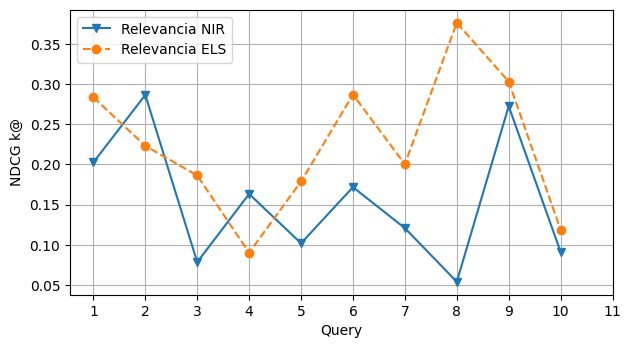

In [101]:
nirndcg = ev.dict_to_list(nir_ndcg['nir_ndcg_k'])[:10]
elsndcg = ev.dict_to_list(els_ndcg['els_ndcg_k'])[:10]

fig, ax = plt.subplots(figsize=(7, 3.7))
ax.plot(nirndcg, 'v', label='Relevancia NIR', linestyle='-')
ax.plot(elsndcg, 'o', label='Relevancia ELS', linestyle='--')

x_stick = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
x_labels = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11"]
plt.xticks(ticks=x_stick, labels=x_labels)
plt.xticks(ticks=x_stick, labels=x_labels)

ax.set_xlabel('Query')
ax.set_ylabel('NDCG k@')
ax.legend()
ax.grid(True)